# (5주차) 10월4일 
> 딥러닝의 기초 - 깊은신경망(DNN)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

In [192]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

## 로지스틱 회귀의 한계 

### 신문기사 (데이터의 모티브)

`-` [스펙이 높아도 취업이 안된다고 합니다..](https://www.joongang.co.kr/article/23637092#home)

**중소·지방 기업 "뽑아봤자 그만두니까"**

중소기업 관계자들은 고스펙 지원자를 꺼리는 이유로 높은 퇴직률을 꼽는다. 여건이 좋은 대기업으로 이직하거나 회사를 관두는 경우가 많다는 하소연이다. 고용정보원이 지난 3일 공개한 자료에 따르면 중소기업 청년취업자 가운데 49.5%가 2년 내에 회사를 그만두는 것으로 나타났다.

중소 IT업체 관계자는 "기업 입장에서 가장 뼈아픈 게 신입사원이 그만둬서 새로 뽑는 일"이라며 "명문대 나온 스펙 좋은 지원자를 뽑아놔도 1년을 채우지 않고 그만두는 사원이 대부분이라 우리도 눈을 낮춰 사람을 뽑는다"고 말했다.

### 가짜데이터 

`-` 위의 기사를 모티브로 한 데이터 

In [200]:
# df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-logistic2.csv')
# df

,x,y
0,-1.000000,0.000051
1,-0.998999,0.000064
2,-0.997999,0.000066
3,-0.996998,0.000052
4,-0.995998,0.000052
...,...,...
1995,0.995998,0.529923
1996,0.996998,0.500087
1997,0.997999,0.497279
1998,0.998999,0.504448


In [944]:
df=pd.read_csv('2022-10-04-logistic2.csv')
df

,x,prob,y
0,-1.000000,0.000045,0.0
1,-0.998999,0.000046,0.0
2,-0.997999,0.000047,0.0
3,-0.996998,0.000047,0.0
4,-0.995998,0.000048,0.0
...,...,...,...
1995,0.995998,0.505002,1.0
1996,0.996998,0.503752,0.0
1997,0.997999,0.502501,1.0
1998,0.998999,0.501251,0.0


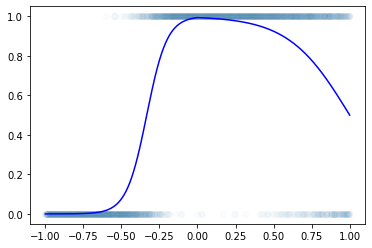

In [954]:
plt.plot(df.x,df.y,'o',alpha=0.02)
plt.plot(df.x,df.prob,'-b')

### 로지스틱 회귀로 적합

In [937]:
x=torch.tensor(df.x).float().reshape(-1,1)
y=torch.tensor(df.y).float().reshape(-1,1)

In [938]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)

In [939]:
loss_fn = torch.nn.BCELoss()

In [940]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.05) 

In [941]:
for epoc in range(5000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

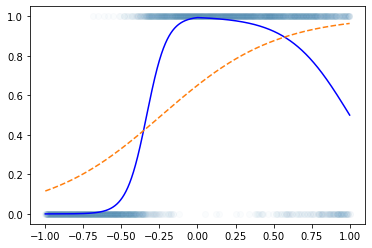

In [955]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.prob,'-b')
plt.plot(x,net(x).data,'--')

### 해결책

`-` sigmoid 넣기 전의 상태가 꺽인그래프 이어야 한다. 

In [956]:
sig = torch.nn.Sigmoid()

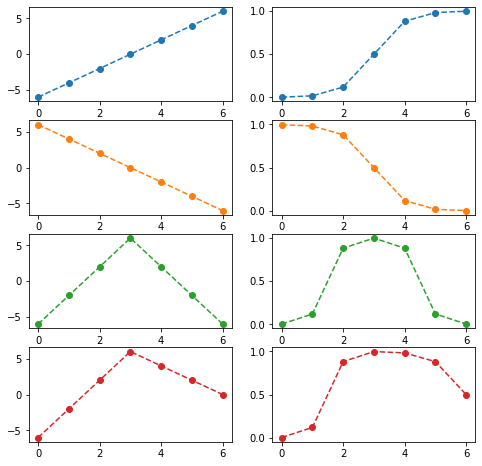

In [957]:
fig,ax = plt.subplots(4,2,figsize=(8,8))
u1 = torch.tensor([-6,-4,-2,0,2,4,6])
u2 = torch.tensor([6,4,2,0,-2,-4,-6])
u3 = torch.tensor([-6,-2,2,6,2,-2,-6])
u4 = torch.tensor([-6,-2,2,6,4,2,0])
ax[0,0].plot(u1,'--o',color='C0');ax[0,1].plot(sig(u1),'--o',color='C0')
ax[1,0].plot(u2,'--o',color='C1');ax[1,1].plot(sig(u2),'--o',color='C1')
ax[2,0].plot(u3,'--o',color='C2');ax[2,1].plot(sig(u3),'--o',color='C2')
ax[3,0].plot(u4,'--o',color='C3');ax[3,1].plot(sig(u4),'--o',color='C3')

## DNN을 이용한 해결 

`-` 목표: 아래와 같은 벡터 ${\boldsymbol u}$를 만들어보자. 

${\boldsymbol u} = [u_1,u_2,\dots,u_{2000}], \quad u_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$

### 꺽인 그래프를 만드는 방법1

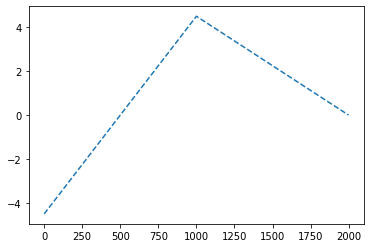

In [958]:
u = [9*xi+4.5 if xi <0 else -4.5*xi+4.5 for xi in x.reshape(-1).tolist()]
plt.plot(u,'--')

### 꺽인 그래프를 만드는 방법2

`-` 전략: 선형변환 $\to$ ReLU $\to$ 선형변환 

(예비학습) ReLU 함수란?

$ReLU(x) = \max(0,x)$

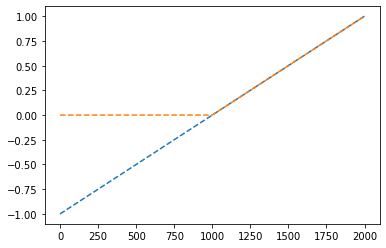

In [959]:
relu=torch.nn.ReLU()
plt.plot(x,'--')
plt.plot(relu(x),'--')

예비학습끝

우리 전략 다시 확인: 선형변환1 -> 렐루 -> 선형변환2

***(선형변환1)***

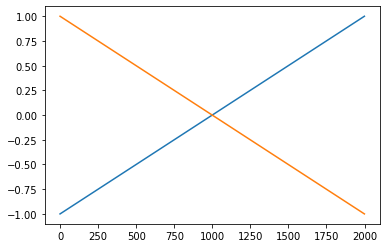

In [960]:
plt.plot(x);plt.plot(-x)

***(렐루)***

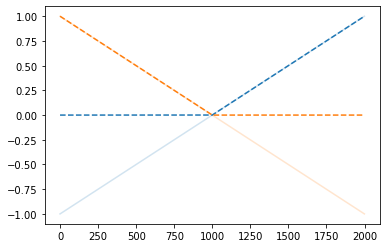

In [961]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.2)
plt.plot(relu(x),'--',color='C0');plt.plot(relu(-x),'--',color='C1')

***(선형변환2)***

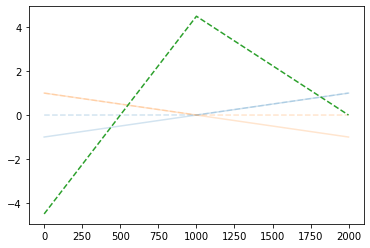

In [962]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.2)
plt.plot(relu(x),'--',color='C0',alpha=0.2);plt.plot(relu(-x),'--',color='C1',alpha=0.2)
plt.plot(-4.5*relu(x)-9.0*relu(-x)+4.5,'--',color='C2')

그래서..? 

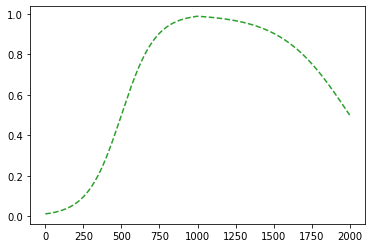

In [963]:
plt.plot(sig(-4.5*relu(x)-9.0*relu(-x)+4.5),'--',color='C2')

정리하면!

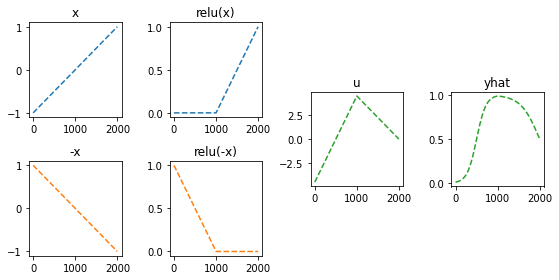

In [964]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title('x'); ax1.plot(x,'--',color='C0')
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title('-x'); ax2.plot(-x,'--',color='C1')
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title('relu(x)'); ax3.plot(relu(x),'--',color='C0')
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title('relu(-x)'); ax4.plot(relu(-x),'--',color='C1')
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title('u'); ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('yhat'); ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

### torch.nn.Linear()를 이용한 꺽인 그래프 구현 

In [965]:
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=1,out_features=2,bias=True) 
a1 = torch.nn.ReLU()
l2 = torch.nn.Linear(in_features=2,out_features=1,bias=True) 
a2 = torch.nn.Sigmoid() 

In [966]:
net = torch.nn.Sequential(l1,a1,l2,a2) 

In [967]:
l1.weight,l1.bias,l2.weight,l2.bias

(Parameter containing:
 tensor([[-0.3467],
         [-0.8470]], requires_grad=True),
 Parameter containing:
 tensor([0.3604, 0.9336], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2880, -0.6282]], requires_grad=True),
 Parameter containing:
 tensor([0.2304], requires_grad=True))

In [968]:
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0, 0.0])
l2.weight.data = torch.tensor([[ -4.5, -9.0]])
l2.bias.data= torch.tensor([4.5])
l1.weight,l1.bias,l2.weight,l2.bias

(Parameter containing:
 tensor([[ 1.],
         [-1.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-4.5000, -9.0000]], requires_grad=True),
 Parameter containing:
 tensor([4.5000], requires_grad=True))

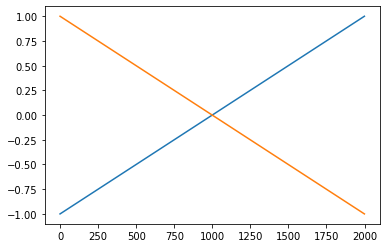

In [969]:
plt.plot(l1(x).data)

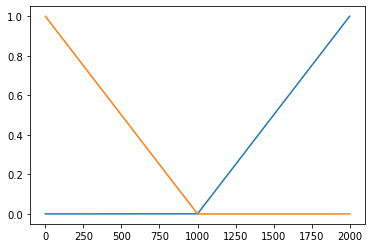

In [970]:
plt.plot(a1(l1(x)).data)

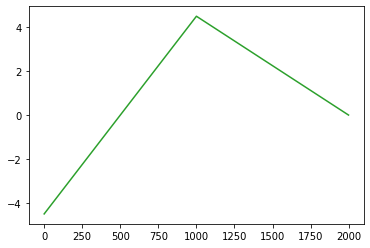

In [971]:
plt.plot(l2(a1(l1(x))).data,color='C2')

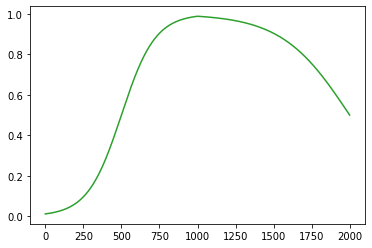

In [972]:
plt.plot(a2(l2(a1(l1(x)))).data,color='C2')

`-` 수식표현

1. ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

2. $l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\  x_n & -x_n\end{bmatrix}$
- ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
- ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

3. $(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\  \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

4. $(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots  \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$ 
- ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
- $b^{(2)}=4.5$

5. $net({\bf X})=(a_2 \circ l_2 \circ a_1\circ l_1)({\bf X})=\text{sig}\Big(\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}\Big)\\=\begin{bmatrix} \text{sig}\Big(-4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5\Big) \\ \text{sig}\Big(-4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \Big)\\ \dots  \\ \text{sig}\Big(-4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \Big)\end{bmatrix}$ 


`-` 차원만 따지자

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

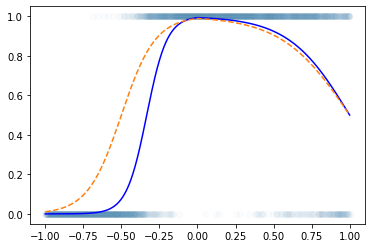

In [976]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.prob,'-b')
plt.plot(x,net(x).data,'--')

### Step1 ~ Step4

`-` 준비

In [977]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Sigmoid()) 

In [978]:
loss_fn = torch.nn.BCELoss()

In [979]:
optimizr = torch.optim.Adam(net.parameters()) # lr은 디폴트값으로..

`-` 반복 

Text(0.5, 1.0, 'before')

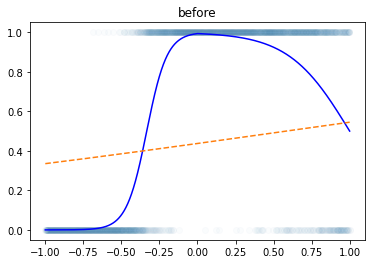

In [982]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.prob,'-b')
plt.plot(x,net(x).data,'--')
plt.title("before")

In [983]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'after 3000 epochs')

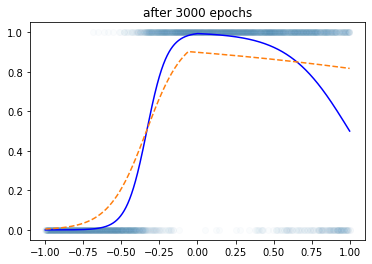

In [984]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.prob,'-b')
plt.plot(x,net(x).data,'--')
plt.title("after 3000 epochs")

In [985]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'after 6000 epochs')

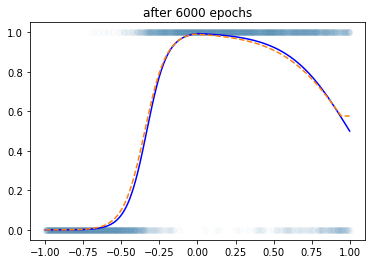

In [986]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.prob,'-b')
plt.plot(x,net(x).data,'--')
plt.title("after 6000 epochs")

## DNN으로 해결가능한 다양한 예제

### 예제1

### 예제2

### 예제3

## HW

## Appedix: 데이터 생성코드 

`-` motivating example 

In [943]:
np.random.seed(43052)
_x = np.linspace(-1,1,2000).tolist()
_f = lambda x: x*15+5 if x<0 else x*(-5) +5 
_u = list(map(_f,_x))
_v = torch.nn.Sigmoid()(torch.tensor(_u))
_y = torch.bernoulli(_v)
pd.DataFrame({'x':_x, 'prob':_v,'y':_y}).to_csv("2022-10-04-logistic2.csv",index=False)

`-` 예제1